# Dataset Augmentation

From work done in Udacity's self driving car nanodegree I know ...

Refs:
https://keras.io/preprocessing/image/
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085
https://github.com/mdbloice/Augmentor

In [1]:
from tensorflow.contrib.keras.python import keras
from tensorflow.contrib.keras.python.keras.preprocessing.image import ImageDataGenerator, ImageDataGenerator, \
                                                                      array_to_img, img_to_array, load_img
from matplotlib import pyplot as plt
import itertools
import matplotlib.image as mpimg
import os
import numpy as np

# two instances with same areguments for mask and image
data_gen_args = dict(rotation_range=40., width_shift_range=0.2, height_shift_range=0.2,
                     shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='reflect') 
img_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

Important to check what happens to the mask. Fill mode is critical in this aspect

In [2]:
img_path = '../data/sample_evaluation_data/patrol_with_targ/images/'
mask_path = '../data/sample_evaluation_data/patrol_with_targ/masks/'
img = load_img(img_path + '2_run2cam1_03367.jpeg')
mask = load_img(mask_path + '2__mask_03367.png')
n_images = 6
augmented_path = '../data/preview/'

x = img_to_array(img)
image = x.reshape((1,) + x.shape)
x = img_to_array(mask)
mask = x.reshape((1,) + x.shape)

seed = 1
img_generator = img_datagen.flow(image, batch_size=1, save_to_dir=augmented_path + 'images/',
                                 save_prefix='test', save_format='jpeg', seed=seed)
mask_generator = img_datagen.flow(mask, batch_size=1, save_to_dir=augmented_path + 'masks/',
                                 save_prefix='test', save_format='png', seed=seed)

i = 1
for batch in zip(img_generator, mask_generator):
    i += 1
    if i > n_images:
        break

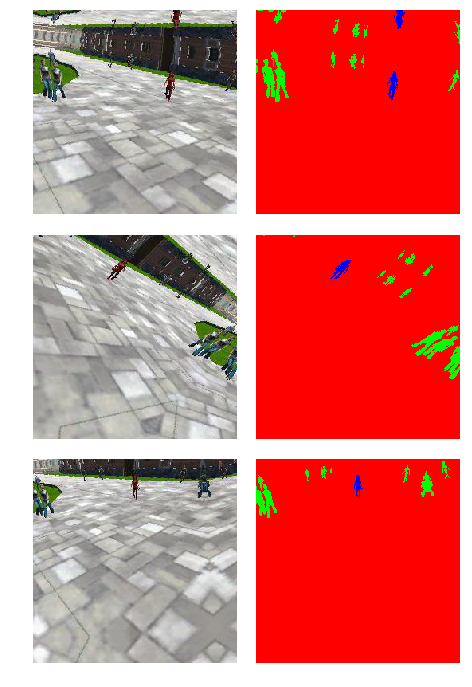

In [3]:
col = 2
row = n_images//col
fig, ax = plt.subplots(row, col)
img_list = os.listdir(augmented_path + 'images/')
mask_list = os.listdir(augmented_path + 'masks/')

for pos in itertools.product(range(row), range(col)):
    a_img = ax[pos[0], 0]
    a_m = ax[pos[0], 1]
    img = mpimg.imread(augmented_path + 'images/' + img_list[pos[0]*col + pos[1]])
    m = mpimg.imread(augmented_path + 'masks/' + mask_list[pos[0]*col + pos[1]])
    a_img.imshow(img)
    a_m.imshow(m)
    a_img.axis('off')
    a_m.axis('off')
    
fig.set_size_inches(8,12)
fig.subplots_adjust(wspace=0, hspace=0.1)
fig


In [4]:
batch_size = 128

In [5]:
# two instances with same areguments for mask and image
data_gen_args = dict(rotation_range=40., width_shift_range=0.2, height_shift_range=0.2,
                     shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='reflect') 
img_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
seed = 1
augmented_path = '../data/train_aug/'
img_generator = img_datagen.flow_from_directory('../data/train/images',
                                                batch_size=batch_size,
                                                class_mode=None,
                                                save_to_dir=augmented_path + 'images/',
                                                save_format='jpeg',
                                                seed=seed)

mask_generator = img_datagen.flow_from_directory('../data/train/masks',
                                                 batch_size=batch_size,
                                                 class_mode=None,
                                                 save_to_dir=augmented_path + 'masks/',
                                                 save_format='png',
                                                 seed=seed)
train_iter = zip(img_generator, mask_generator)
i = 1
samples_mult = 1000
for batch in train_iter:
    i += 1
    if i > samples_mult:
        break

Found 4131 images belonging to 1 classes.
Found 4131 images belonging to 1 classes.
